In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as colors
import datetime as dt
from statistics import mode
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/CVIP/PHASE-2/Normal Task/spam.csv', encoding='latin-1')

In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
796,spam,"Orange customer, you may now claim your FREE C...",NaN,NaN,NaN
1738,ham,K go and sleep well. Take rest:-).,NaN,NaN,NaN
2457,ham,K.k..how is your sister kids?,NaN,NaN,NaN
5277,ham,"Best msg: It's hard to be with a person, when ...",NaN,NaN,NaN
1215,ham,that would be good Û_ I'll phone you tomo lun...,NaN,NaN,NaN


In [15]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [16]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_3.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

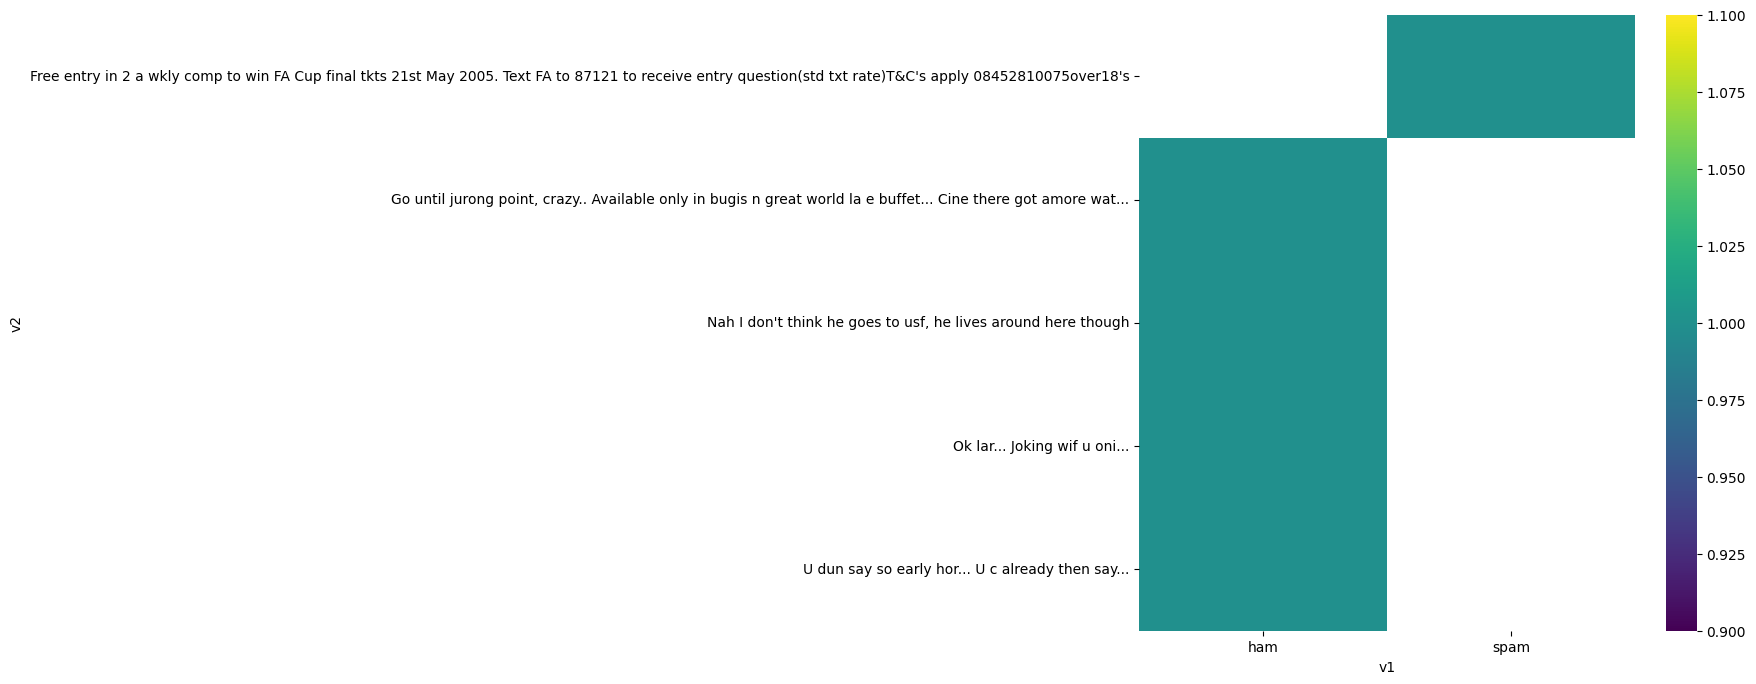

In [64]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_3.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

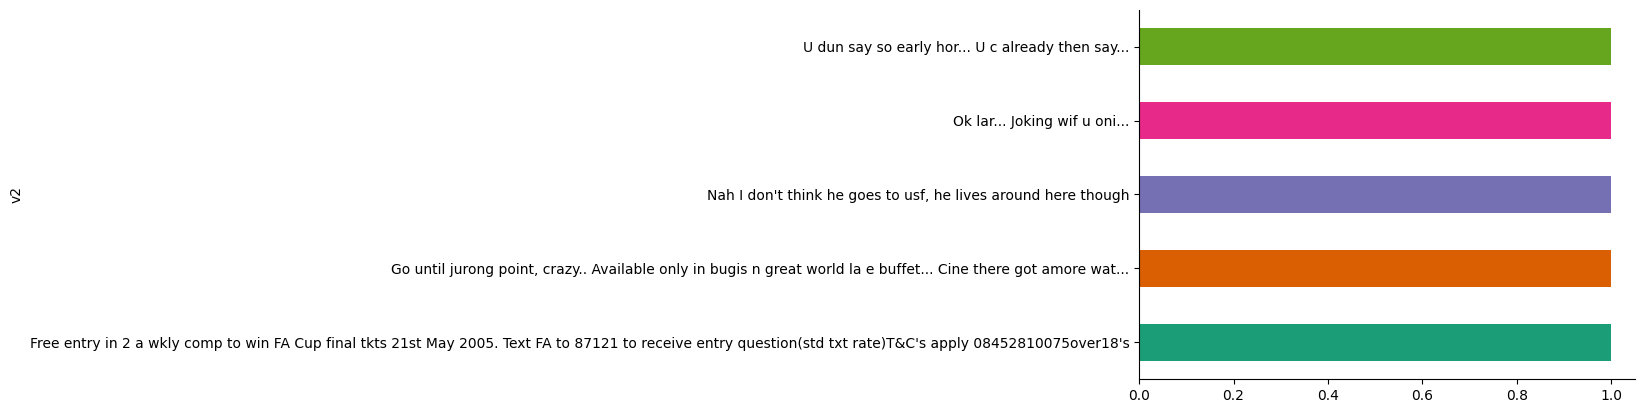

In [65]:
_df_2.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

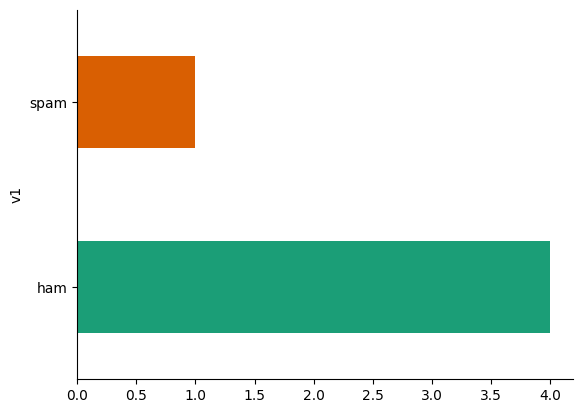

In [66]:
_df_1.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df.isna().any()

v1    False
v2    False
dtype: bool

In [19]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [20]:
df['v2'].nunique()

5169

In [21]:
df.shape

(5572, 2)

In [22]:
df['v2'].drop_duplicates(inplace = True)

In [23]:
df.shape

(5572, 2)

In [24]:
class_counts = df['v1'].value_counts()

fig = px.bar(class_counts,
             x=class_counts.index,
             y=class_counts.values,
             title='Class Distribution of Spam/Ham',
             labels={'x': 'Spam/Ham', 'y': 'Number of Mails'})

fig.update_layout(xaxis_title='Spam/Ham', yaxis_title='Number of Mails')

fig.show()

In [25]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
all_text = ' '.join(df['v2'].values)
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [27]:
words = all_text.split()

In [28]:
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [29]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1466),
 ('u', 692),
 ('2', 453),
 ('call', 376),
 ('get', 326),
 ('U', 299),
 ('ur', 293),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 249),
 ('.', 235),
 ('go', 234),
 ('know', 224),
 ('like', 222),
 ('got', 204),
 ('come', 198),
 ('?', 187),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 141),
 ('n', 137),
 ("I'll", 137),
 ('How', 137),
 ('still', 134),
 ('If', 133),
 ('one', 132),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 118),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('see', 113),
 ('r', 113),
 ('back', 111),
 ('home', 107),
 ('&', 107),
 ('Ì_', 105),
 ('tell', 104),
 ('Your', 104),
 ('take', 101),
 ('What', 101),
 ('day', 101),
 ('free', 99),
 ('My', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('dont', 97),
 ('The', 95),
 ('mobile', 94),
 ('A', 92),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('-', 88),
 ('phone', 88),
 ('late

In [30]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]

fig = go.Figure(data=[go.Bar(x=x_values, y=y_values)])
fig.update_layout(title='Most Commonly Used Words', xaxis_title='Word', yaxis_title='Frequency')

fig.show()

# Natural Language Processing
---

In [31]:
def clean_text(text):
  text = re.sub('<.*?>', '', text)
  text = re.sub('[^a-zA-Z]', ' ', text).lower()
  words = nltk.word_tokenize(text)
  words = [w for w in words if w not in stopwords.words('english')]
  stemmer = PorterStemmer()
  words = [stemmer.stem(w) for w in words]
  text = ' '.join(words)
  return text

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from tqdm.auto import tqdm
import time

In [34]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

CPU times: user 12.9 s, sys: 1.42 s, total: 14.3 s
Wall time: 15.2 s


In [35]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [39]:
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.9775784753363229


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9713004484304932


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9766816143497757


In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [48]:
y_pred = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.9775784753363229


In [49]:
from sklearn.svm import SVC

In [50]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [51]:
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9775784753363229


In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.9210762331838565


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [57]:
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.967713004484305


In [58]:
import xgboost as xgb

In [59]:
y_train_binary = y_train.apply(lambda label: 1 if label == 'spam' else 0)
y_test_binary = y_test.apply(lambda label: 1 if label == 'spam' else 0)

In [60]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [61]:
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test_binary, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.9775784753363229


In [62]:
print("Accuracy Comparison of Machine Learning Algorithms")
print("-----------------------------------------------")
print("{:<25} {:<10}".format('Algorithm', 'Accuracy'))
print("-----------------------------------------------")

algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_nb, accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_gb, accuracy_xgb]

for name, accuracy in zip(algorithm_names, accuracies):
    print("{:<25} {:<10.2f}%".format(name, accuracy * 100))

Accuracy Comparison of Machine Learning Algorithms
-----------------------------------------------
Algorithm                 Accuracy  
-----------------------------------------------
Naive Bayes               97.76     %
Random Forest             97.67     %
SVM                       97.76     %
Logistic Regression       97.76     %
KNN                       92.11     %
Decision Tree             97.13     %
Gradient Boosting         96.77     %
XGBoost                   97.76     %


In [63]:
algorithm_names = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_nb, accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_gb, accuracy_xgb]

fig = go.Figure()

fig.add_trace(go.Scatter(x=algorithm_names, y=accuracies, mode='lines+markers'))

fig.update_layout(
    title='Accuracy Comparison of Machine Learning Algorithms',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy',
    xaxis_tickangle=-45,
    margin=dict(l=0, r=0, b=0, t=40),
)

fig.show()

The analysis begins with data preprocessing and exploratory data visualization, where you've loaded a dataset containing spam and ham (non-spam) messages. You've removed unnecessary columns, visualized the class distribution using a bar plot, and identified the most commonly used words in the messages.

Following this, you've conducted text preprocessing by cleaning and tokenizing the text data. You've employed various machine learning algorithms to classify messages as spam or ham. The algorithms used include Logistic Regression, Decision Tree, Random Forest, Naive Bayes, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Gradient Boosting, and XGBoost.

The accuracy comparison of these algorithms reveals the following results:

*   **Naive Bayes:** 97.76%
*   **Random Forest:** 97.67%
*   **SVM:** 97.76%
*   **Logistic Regression**: 97.76%
*   **KNN:** 92.11%
*   **Decision Tree:** 97.13%
*   **Gradient Boosting**: 96.77%
*   **XGBoost:** 97.76%

Based on the analysis, it can be concluded that the Naive Bayes, SVM, Logistic Regression, and XGBoost classifiers are performing consistently well with high accuracy (above 97%). The Random Forest and Decision Tree models are also performing well, although slightly below the top-performing classifiers. The KNN and Gradient Boosting models have slightly lower accuracy compared to the others.

In this particular task of classifying spam and ham messages, the Naive Bayes, SVM, Logistic Regression, and XGBoost classifiers are recommended for their high accuracy. However, it's important to note that accuracy alone might not be the only consideration when selecting a model. Other factors such as model complexity, interpretability, training time, and false positive/negative rates should also be taken into account when making a final decision about which model to use.